In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import utilities

/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Cargar datos
input_file = 'data_multivar.txt'
X, y = utilities.load_data(input_file)

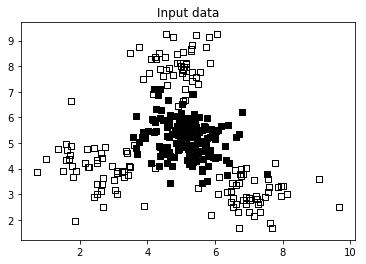

In [3]:
# Separar datos en 2 clases
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])


# Plot the input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Input data')

In [4]:
# Dividir entre datos entrenamiento y test
from sklearn import cross_validation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

In [5]:
#Entrenar nuestro modelo

params = {'kernel': 'linear'}
#params = {'kernel': 'poly', 'degree': 3}
#params = {'kernel': 'rbf'}
#params = {'kernel': 'rbf', 'probability': True}

classifier = SVC(**params)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

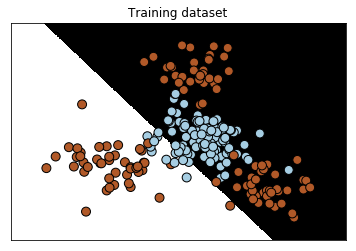

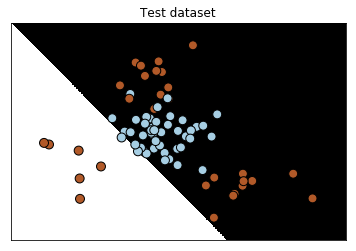

In [6]:
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')


y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, y_test, 'Test dataset')

In [7]:
# Evaluar rendimiento de nuestro clasificador
from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print( "\nClassifier performance on training dataset\n")
print( classification_report(y_train, classifier.predict(X_train), target_names=target_names))
print("#"*30 + "\n")

print("#"*30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print( "#"*30 + "\n")

plt.show()


##############################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.55      0.88      0.68       105
    Class-1       0.78      0.38      0.51       120

avg / total       0.67      0.61      0.59       225

##############################

##############################

Classification report on test dataset

             precision    recall  f1-score   support

    Class-0       0.64      0.96      0.77        45
    Class-1       0.75      0.20      0.32        30

avg / total       0.69      0.65      0.59        75

##############################



In [8]:
### Encontrar los valores optimos de C y gamma mediante GridSearchCV

In [13]:
from sklearn import svm, grid_search, model_selection
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
parameter_grid = [  {'kernel': ['linear'], 'C': [1, 10, 50, 600]},
                    {'kernel': ['poly'], 'degree': [2, 3]},
                    {'kernel': ['rbf'], 'gamma': [0.01, 0.001], 'C': [1, 10, 50, 600]},
                 ]

metrics = ['precision', 'recall_weighted']

for metric in metrics:
    print('\n#### Buscando parametros optimos para la metrica', metric)
    classifier = grid_search.GridSearchCV(svm.SVC(C=1), parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)

    print('\nPuntuaciones para cada valor de C,variando el kernel:')
    for params, avg_score, _ in classifier.grid_scores_:
        print( params, '-->', round(avg_score, 3))

    print('Valor optimo:', classifier.best_params_)



    y_true, y_pred = y_test, classifier.predict(X_test)
    print('\nPerformance report:\n')
    print(classification_report(y_true, y_pred))


#### Buscando parametros optimos para la metrica precision

Puntuaciones para cada valor de C,variando el kernel:
{'C': 1, 'kernel': 'linear'} --> 0.676
{'C': 10, 'kernel': 'linear'} --> 0.676
{'C': 50, 'kernel': 'linear'} --> 0.676
{'C': 600, 'kernel': 'linear'} --> 0.676
{'degree': 2, 'kernel': 'poly'} --> 0.872
{'degree': 3, 'kernel': 'poly'} --> 0.872
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.98
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.533
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.983
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.543
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.959
{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.806
{'C': 600, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.967
{'C': 600, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.983
Valor optimo: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Performance report:

             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        45
        1.0       0.96      0.87     

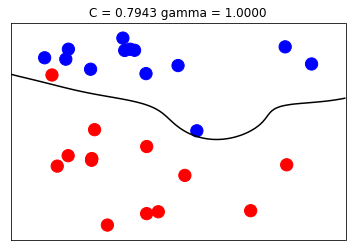

In [10]:
from plot_svm_interactive import plot_svm_interactive
plot_svm_interactive()